In [2]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
import pandas as pd

# Load the data using pandas
X = pd.read_csv('dataset02.csv',header=None, skiprows=1, usecols=range(1,107)).values

# Realizar la descomposición SVD
y = np.loadtxt('y2.txt')


# Función para calcular la similitud
def kernel(x1, x2, sigma=1.0):
    return np.exp(-np.sum((x1 - x2)**2) / (2 * sigma**2))

# Proyectar los datos a diferentes dimensiones



In [3]:
U, s, Vh = svd(X, full_matrices=False)


def project_data(d):
    Vd = Vh.T[:, :d]
    Z = X @ Vd
    return Z

# Calcular la similaridad par a par en el espacio original y reducido
def calc_similarity(d, simga):
    Z = project_data(d)
    similarity = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            similarity[i, j] = kernel(Z[i], Z[j], sigma=simga)
    return similarity

# Resolver el problema de mínimos cuadrados
def least_squares(d):
    Z = project_data(d)
    beta = np.linalg.pinv(Z) @ y
    y_pred = Z @ beta
    error = np.linalg.norm(y_pred - y)
    return beta, error





In [4]:
tolerance = 0.0001  # Define tu tolerancia aquí

# Usando comprensión de lista
s = np.array([val if val > tolerance else 0 for val in s])

# O usando un bucle for
for i in range(len(s)):
    if s[i] < tolerance:
        s[i] = 0

<Figure size 1000x800 with 0 Axes>

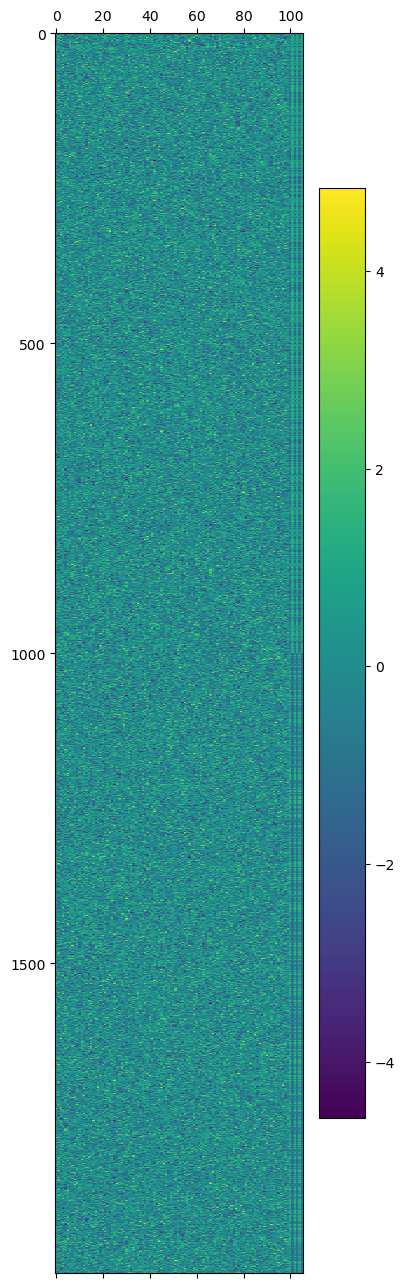

In [5]:

plt.figure(figsize=(10, 8))  # Set figure size
plt.matshow(X, aspect='auto')
plt.colorbar()  # Add a colorbar for reference
plt.show()

85.66518719343702


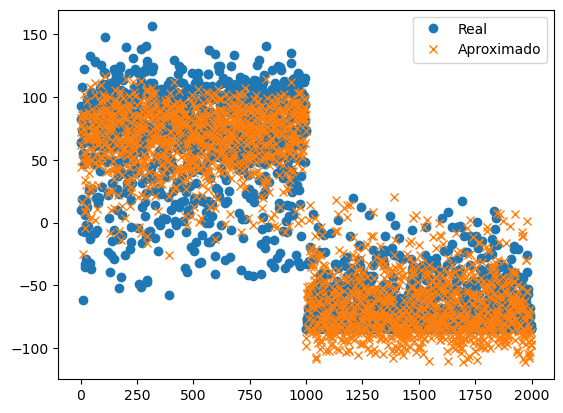

862.5534206634165
2 895.9933068717569 0.2719147196715909
3 893.3806261821287 0.2711218272114988
4 893.3539277966225 0.2711137248250692
5 893.2681337574021 0.27108768817731166
6 889.5682111231531 0.26996484114465813
7 889.5594028601699 0.269962168026074
8 887.3581089130103 0.26929412260434366
9 884.181706463286 0.2683301527007107
10 883.759851794525 0.2682021288716056
11 883.7144683642786 0.2681883559755152
12 882.0195167223873 0.2676739745654901
13 881.2850823667502 0.267451089516686
14 881.284193734218 0.2674508198358033
15 880.8114935222189 0.2673073654766595
16 880.7931137464489 0.267301787609573
17 880.5736725331822 0.26723519191568534
18 880.5439133016768 0.26722616062825233
19 880.1684239674762 0.2671122076821022
20 880.1413337176579 0.2671039863732725
21 880.1060376694777 0.26709327478092815
22 879.4862284415386 0.26690517599584535
23 879.4231030220486 0.26688601878717744
24 879.2123887360351 0.2668220715282273
25 879.1319199932923 0.26679765099354535
26 878.3252359558021 0.2665

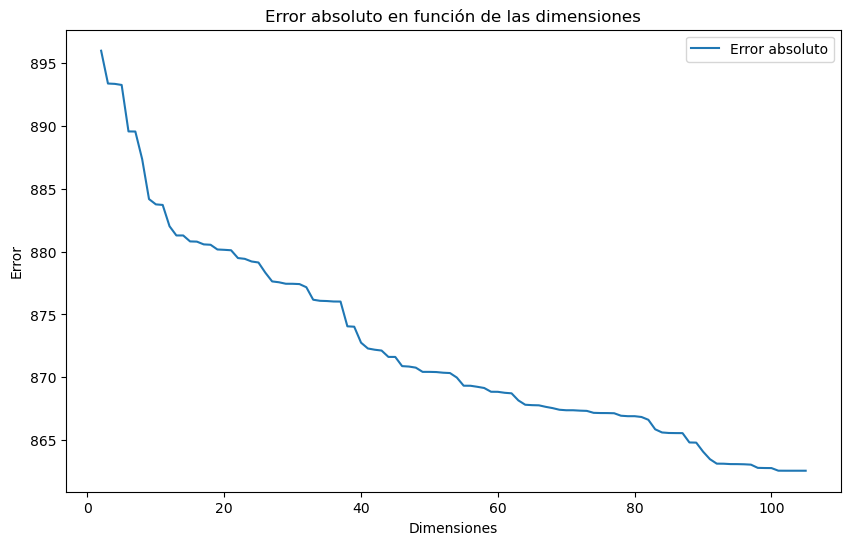

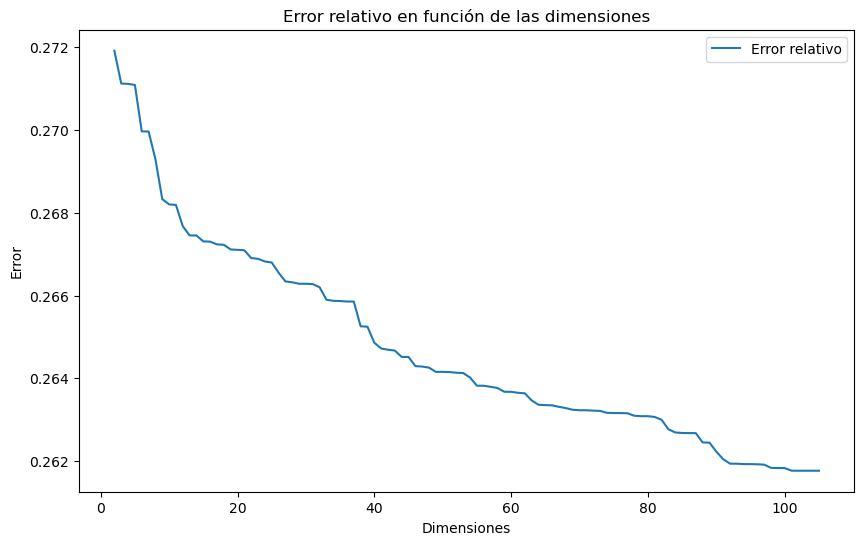

In [6]:
# Calculate the pseudoinverse of X using its SVD components
x_inv= np.linalg.pinv(X)
# Solve for b
b = x_inv @ y 

print(np.mean(y))

y_rearreranged = y - np.mean(y)



y_aprox = X @ b 

error_absoluto = np.abs (y_rearreranged-y_aprox)


plt.plot(y_rearreranged, 'o', label='Real')
plt.plot(y_aprox, 'x', label='Aproximado')
plt.legend()
plt.show()



print(np.linalg.norm(error_absoluto))
norma_y = np.linalg.norm(y_rearreranged)
errores_absoluto_norma= []
errores_relativo_norma= []
for i in range(2, 106):
    pca= project_data(i)
    x_inv_pca = np.linalg.pinv(pca)
    b= x_inv_pca @ y
    y_aprox = pca@ b 
    error_relativo = np.abs((y_rearreranged - y_aprox) / y_rearreranged)
    error_absoluto = np.abs (y_rearreranged-y_aprox)

    error=np.linalg.norm(error_absoluto)
    errores_absoluto_norma.append(error)
    errores_relativo_norma.append(error/norma_y)
    print(i, error , error/norma_y)

print(np.argmin(errores_absoluto_norma), min(errores_absoluto_norma))
print(np.argmin(errores_relativo_norma), min(errores_relativo_norma))


# Graficar el error absoluto
plt.figure(figsize=(10, 6))
plt.plot(range(2, 106), errores_absoluto_norma, label='Error absoluto')
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Error absoluto en función de las dimensiones')
plt.legend()
plt.show()

# Graficar el error relativo
plt.figure(figsize=(10, 6))
plt.plot(range(2, 106), errores_relativo_norma, label='Error relativo')
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Error relativo en función de las dimensiones')
plt.legend()
plt.show()

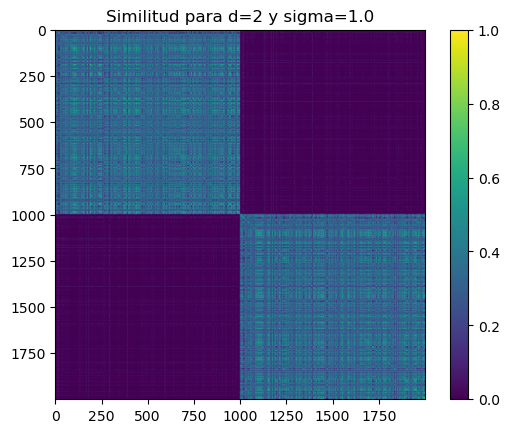

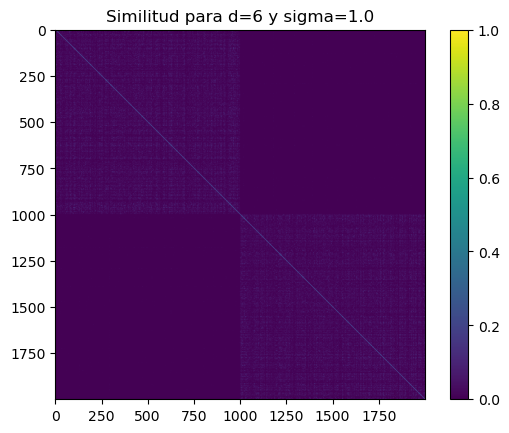

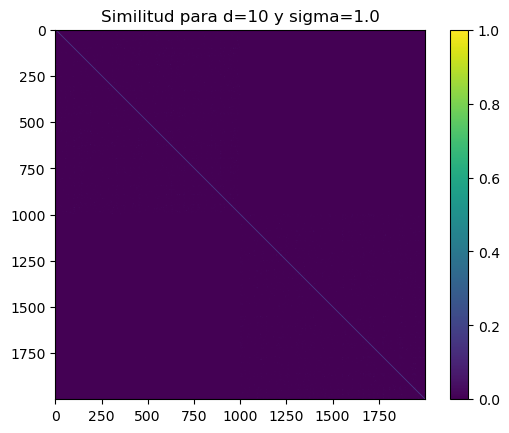

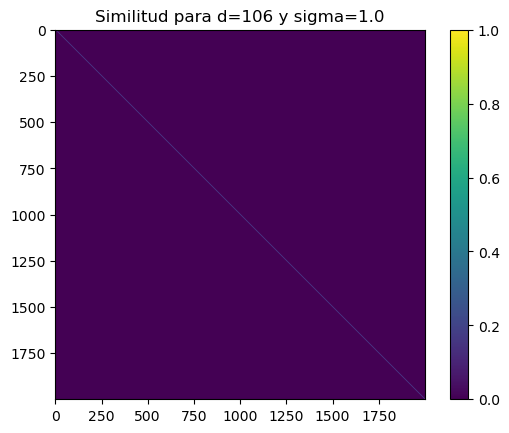

In [7]:
for d in [2, 6, 10, X.shape[1]]:
    for sigma  in [ 1.0]:
        sim = calc_similarity(d, sigma)
        plt.imshow(sim)
        plt.colorbar()
        plt.title(f'Similitud para d={d} y sigma={sigma}')
        plt.show()

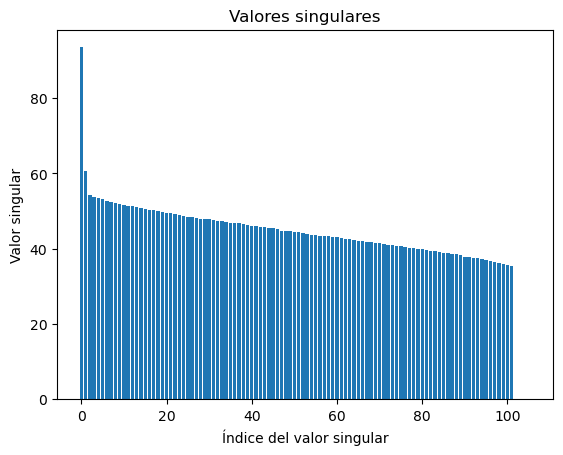

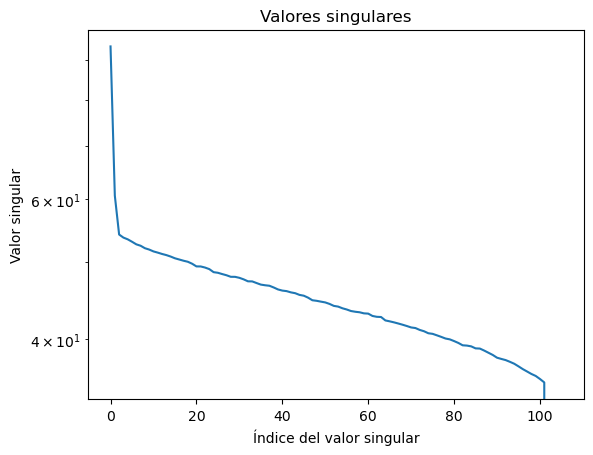

[93.53998012 60.67025502 54.19687415 53.71817207 53.45002026 53.07597253
 52.67896351 52.46377109 52.0901588  51.8850233  51.60671795 51.42595037
 51.22611629 51.05881007 50.84361073 50.58741153 50.41074895 50.23082469
 50.08091326 49.79631601 49.41239691 49.40317323 49.24812008 49.02368032
 48.59328888 48.50521223 48.32506329 48.15978559 47.94305341 47.93713858
 47.80151295 47.58811177 47.32006189 47.30518758 47.08377488 46.86983496
 46.77983356 46.71441459 46.48013009 46.21590274 46.06317733 45.99166316
 45.82527708 45.71630925 45.49176587 45.3850361  45.12805607 44.79003536
 44.71666705 44.60925101 44.50779642 44.31474942 44.06336035 43.97296524
 43.75887065 43.60533313 43.4113101  43.3186213  43.25494778 43.11921716
 43.08660675 42.7945522  42.68945452 42.66337909 42.2423005  42.13252017
 42.00834992 41.86835898 41.72209991 41.56266802 41.39200385 41.31985191
 41.09459588 40.93808301 40.70046704 40.63035313 40.45573293 40.27515678
 40.08333059 39.98504394 39.78705979 39.57077402 39

In [7]:
plt.bar(range(len(s)), s)
plt.xlabel('Índice del valor singular')
plt.ylabel('Valor singular')
plt.title('Valores singulares')
plt.show()

plt.semilogy(range(len(s)), s)
plt.xlabel('Índice del valor singular')
plt.ylabel('Valor singular')
plt.title('Valores singulares')
plt.show()
print(s)

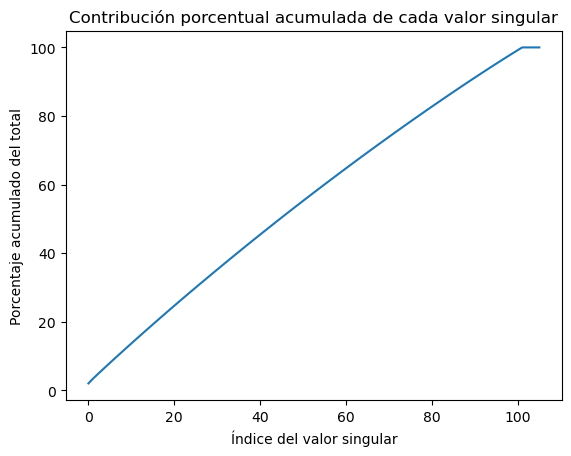

In [8]:
# Calcular los porcentajes
percentages = s / np.sum(s) * 100

# Calcular la suma acumulativa de los porcentajes
cumulative_percentages = np.cumsum(percentages)

# Crear el gráfico de barras
plt.plot(range(len(cumulative_percentages)), cumulative_percentages)
plt.xlabel('Índice del valor singular')
plt.ylabel('Porcentaje acumulado del total')
plt.title('Contribución porcentual acumulada de cada valor singular')
plt.show()

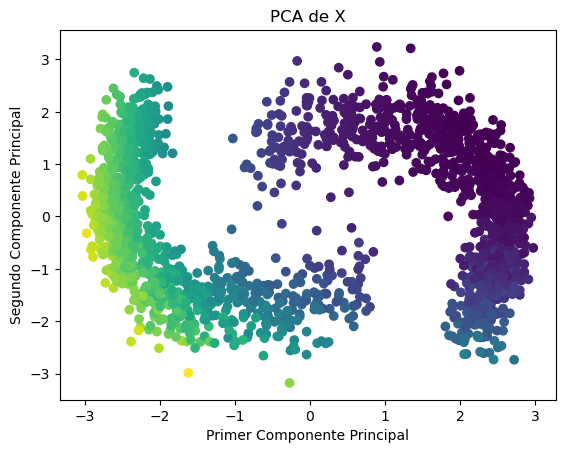

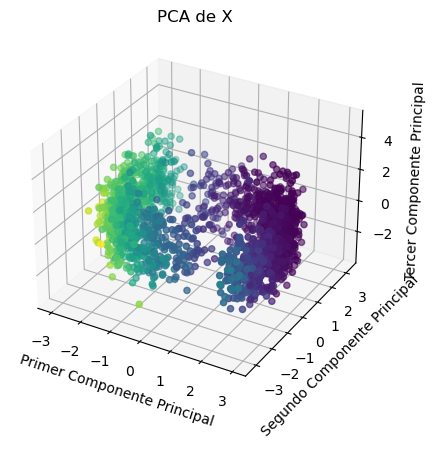

In [15]:



X_pca = project_data(2)
# Graficar los datos transformados
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis' , c=y)
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('PCA de X')
plt.show()

x_pca_3d = project_data(3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca_3d[:, 0], x_pca_3d[:, 1], x_pca_3d[:, 2], c=y)
ax.set_xlabel('Primer Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_zlabel('Tercer Componente Principal')
ax.set_title('PCA de X')
plt.show()


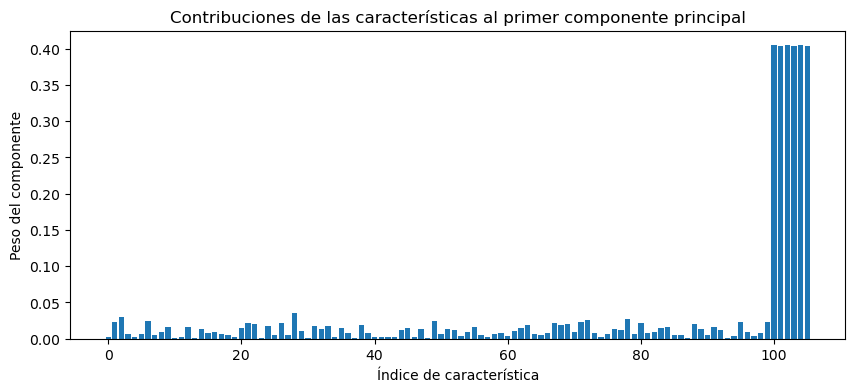

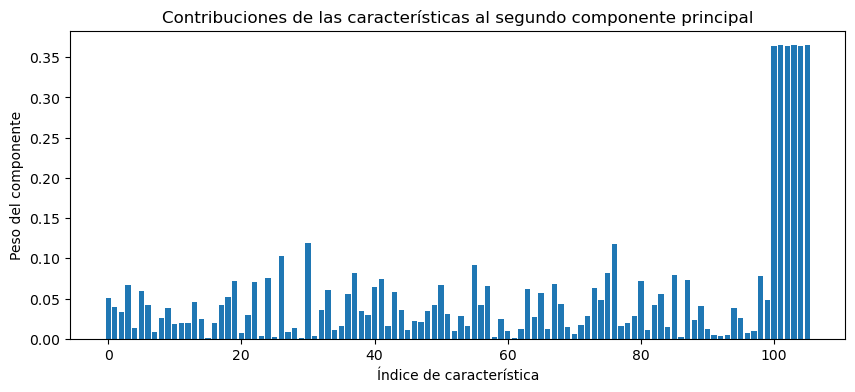

In [14]:
# Obtener los componentes
componentes = Vh[:2]

# Crear un gráfico de barras para el primer componente
plt.figure(figsize=(10, 4))
plt.bar(range(len(componentes[0])), np.abs(componentes[0]))
plt.xlabel('Índice de característica')
plt.ylabel('Peso del componente')
plt.title('Contribuciones de las características al primer componente principal')
plt.show()

# Crear un gráfico de barras para el segundo componente
plt.figure(figsize=(10, 4))
plt.bar(range(len(componentes[1])), np.abs(componentes[1]))
plt.xlabel('Índice de característica')
plt.ylabel('Peso del componente')
plt.title('Contribuciones de las características al segundo componente principal')
plt.show()